In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [4]:
%cd detection

C:\Users\Alberto Zurli\DataspellProjects\thesis\detection


In [8]:
!python -m pip install .

Processing c:\users\alberto zurli\dataspellprojects\thesis\detection


  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.


  Using cached tables-3.6.1-2-cp37-cp37m-win_amd64.whl (3.1 MB)
  Using cached PyYAML-5.4.1-cp37-cp37m-win_amd64.whl (210 kB)
  Using cached PIMS-0.5.tar.gz (85 kB)
  Using cached PyWavelets-1.1.1-cp37-cp37m-win_amd64.whl (4.2 MB)
  Using cached slicerator-1.0.0-py3-none-any.whl (9.3 kB)
  Using cached numexpr-2.7.3-cp37-cp37m-win_amd64.whl (93 kB)
  Created wheel for sdt-python: filename=sdt_python-17.0-py3-none-any.whl size=381167 sha256=99a120f882a7188d692b92a7fb579a15ee0f975a64f3dcbf3f20aa106ceeb6bf
  Stored in directory: C:\Users\ALBERT~1\AppData\Local\Temp\pip-ephem-wheel-cache-guak59dy\wheels\d5\8e\50\279375b90b5f95abb5706a2f3c55a7144424cd9270fb08e534
  Created wheel for pims: filename=PIMS-0.5-py3-none-any.whl size=85364 sha256=5711fdf4096777d59d96c3d8156b8d3648516c0215cdc7baa91a6b496c543037
  Stored in directory: c:\users\alberto zurli\appdata\local\pip\cache\wheels\75\02\a9\86571c38081ba4c1832eb95430b5d588dfa15a738e2a603737
Successfully built sdt-python pims


In [9]:
%cd ..

C:\Users\Alberto Zurli\DataspellProjects\thesis


In [10]:
import detection.sdt.changepoint as detection

In [5]:
def read_csv(filename):
    path = Path("")
    csv_path = path.joinpath(filename)
    lines = [x.strip() for x in open(csv_path, 'r').readlines()][1:]
    value_list = lines[0].split(',')
    value_list.pop(0)
    value_list = [float(i) for i in value_list]
    return value_list

In [11]:
def bayesian_online(data,past,threshold):
    det = detection.BayesOnline()
    chp_online = det.find_changepoints(data,past=past,prob_threshold=threshold)
    # plt.figure(figsize=(10,6))
    # plt.plot(data)
    # for i in chp_online:
    #     plt.axvline(i,color="red")
    # plt.title("Bayesian Online V1")
    # plt.show()
    return chp_online

In [7]:
def compute_diff(data):
    diff = np.diff(data,axis=0)
    return diff.tolist()

In [8]:
def compute_heatmap(data,title):
    th = np.arange(0.1,1,0.1)
    past = np.arange(10,210,10)
    matrix = np.zeros((len(th),len(past)))
    for i,t in enumerate(th):
        for j,p in enumerate(past):
            chp = bayesian_online(data,p,t)
            matrix[i,j] = len(chp)

    mat = pd.DataFrame(matrix)
    mat.columns = past
    mat.index = th
    plt.figure(figsize=(10, 6))
    fig = sns.heatmap(mat.iloc[::-1],annot=True,cmap='viridis')
    plt.xlabel("Past")
    plt.ylabel("Threshold")
    plt.title(title)
    plt.show(fig)

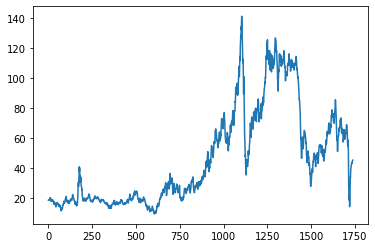

In [9]:
brent = read_csv("brent-monthly.csv")
brent = np.array(brent).reshape(-1,1)
plt.plot(brent)
plt.show()

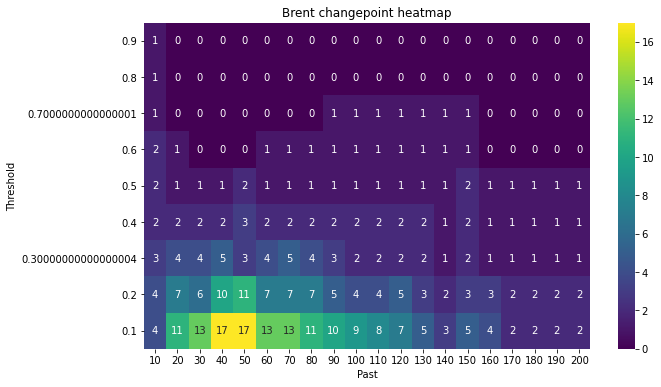

In [15]:
compute_heatmap(brent,"Brent changepoint heatmap")

In [16]:
brent_diff = read_csv("brent-monthly.csv")
brent_diff = np.array(brent_diff).reshape(-1,1)

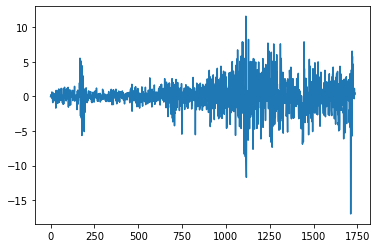

In [17]:
brent_diff = compute_diff(brent_diff)
plt.plot(brent_diff)
plt.show()

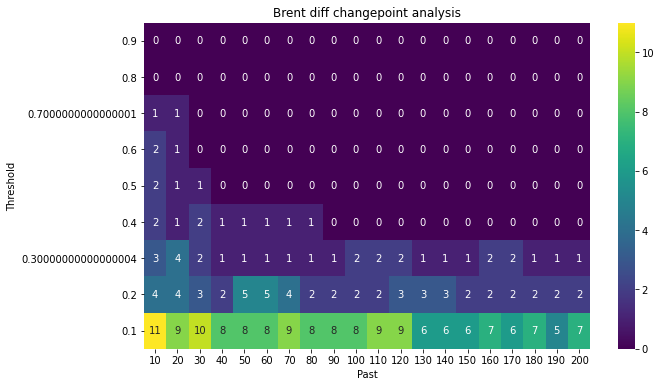

In [18]:
compute_heatmap(brent_diff,"Brent diff changepoint analysis")

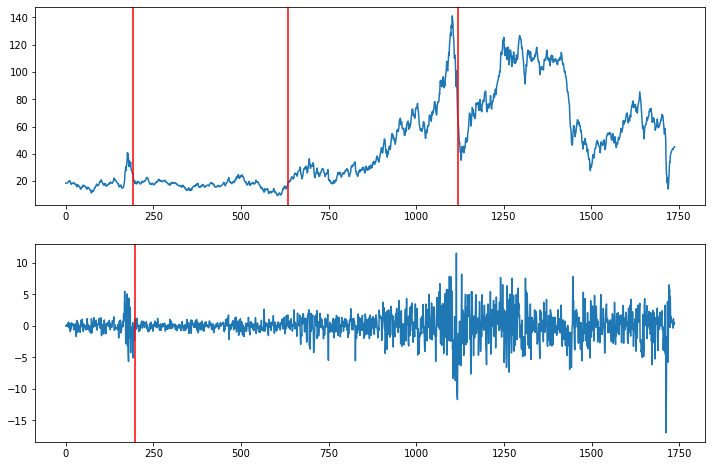

In [38]:
past = 50
th = 0.3
chp_brent = bayesian_online(brent,past,th)
chp_diff = bayesian_online(brent_diff,past,th)
fig,axs = plt.subplots(2,figsize=(12,8))
axs[0].plot(brent)
for i in chp_brent:
    axs[0].axvline(i,color='red')
axs[1].plot(brent_diff)
for i in chp_diff:
    axs[1].axvline(i,color='red')

In [13]:
df = pd.read_csv('csv/wti.csv')

<AxesSubplot:>

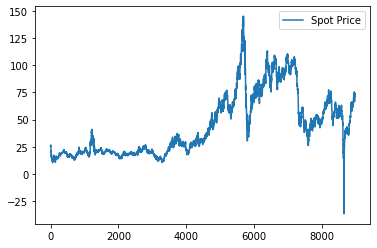

In [14]:
df.plot()

In [16]:
np.array(df['Spot Price']).reshape(-1,1)

array([[25.56],
       [26.  ],
       [26.53],
       ...,
       [71.31],
       [  nan],
       [  nan]])

In [19]:
df = df[:-2]

In [22]:
df = df.set_index('Date')

In [26]:
wti = np.array(df).reshape(-1,1)

In [27]:
wti

array([[25.56],
       [26.  ],
       [26.53],
       ...,
       [73.62],
       [73.93],
       [71.31]])

In [46]:
chp = [3983,5724,7261]

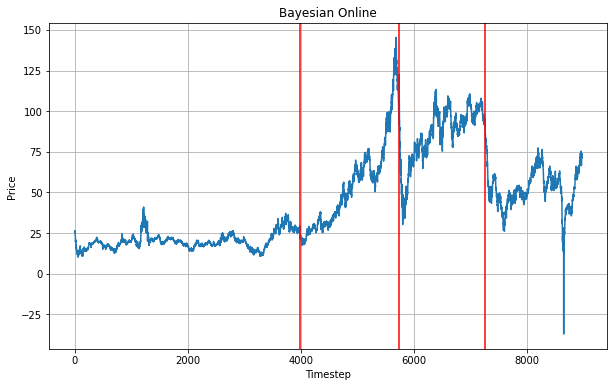

In [47]:
past = 50
th = 0.2
# chp = bayesian_online(wti,past,th)
plt.figure(figsize=(10, 6))
plt.plot(wti)
plt.grid(True)
for i in chp:
    plt.axvline(i, color="red")
plt.title("Bayesian Online")
plt.xlabel("Timestep")
plt.ylabel("Price")
plt.show()

In [48]:
df

,Spot Price
Date,
1/2/1986,25.56
1/3/1986,26.00
1/6/1986,26.53
1/7/1986,25.85
1/8/1986,25.87
...,...
7/27/2021,71.68
7/28/2021,72.37
7/29/2021,73.62


In [49]:
df.to_csv('oil-daily.csv')